# Лабораторная работа №5
### Посторение типовых моделей АРПСС (ARIMA)
## РИ-681223 Черепанов Александр
### Вариант №19

In [44]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

import h5py

from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Cоздадим собственные АРПСС ряды первого и второго порядков для изучения их автокорреляционных функций. Создадим два АР(1) процесса первого порядка:

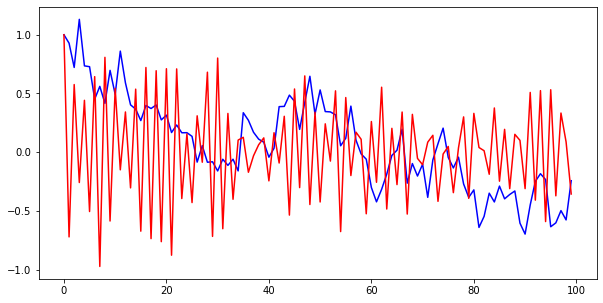

In [45]:
z1 = np.zeros(100)
z2 = np.zeros(100)

z1[0] = 1
z2[0] = 1

for i in range(1,100):
  z1[i] = 0.8 * z1[i-1] + 0.2 * np.random.randn()
  z2[i] = -0.8 * z2[i-1] + 0.2 * np.random.randn()
  
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

Теперь построим для этих рядов функции автокорреляции:

<Figure size 720x360 with 0 Axes>

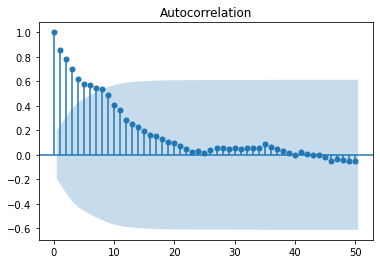

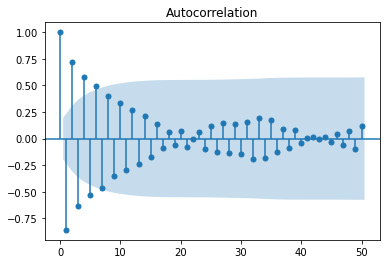

In [46]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

Для АР с положительным коэфициентом можно заметить, что зависимость с каждым лагом меняется незначительно. Во втором случае, по автокорреляционной функции можно отметить резкие колебания в ВР. Так же можно заметить, что значения автокорреляционных функций при лаге 1 близки к значениям весовых параметров этих процессов.

Удостоверимся,  что  для  модели  АР(1)  коэффициенты автокорреляции изменяются по степенному закону:

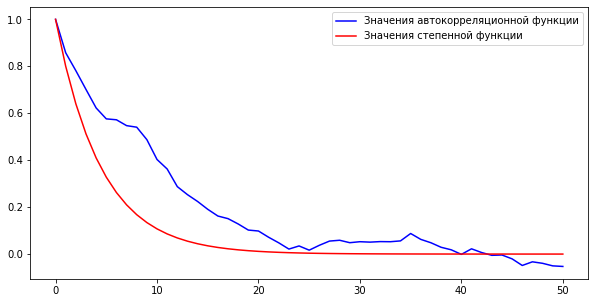

In [47]:
plt.figure(figsize = (10, 5))
plt.plot(range(51), acf(z1, nlags=50, fft=True), 'b', label='Значения автокорреляционной функции')
plt.plot(range(51), np.array([0.8**l for l in range(51)]), 'r', label='Значения степенной функции')
plt.legend()
plt.show();

Аналогичным  образом  построем  два  СС(1)  процесса  среднего-скользящего первого порядка:

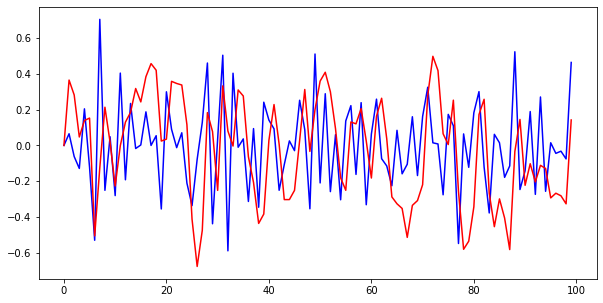

In [48]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)

for i in range(1, 100):
  z3[i] = ar[i] -0.8 * ar[i -1]
  z4[i] = ar[i] + 0.8 * ar[i -1]
  
plt.figure(figsize= (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

Посторим для этих рядов функции автокорреляции:

<Figure size 720x360 with 0 Axes>

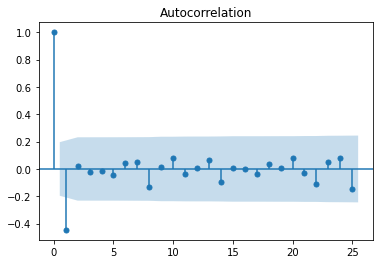

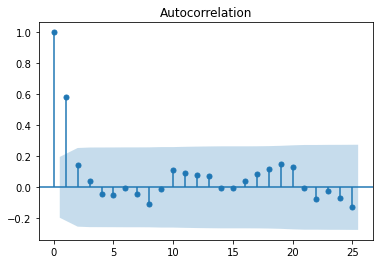

In [49]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

Убежадемся, что значение коэфициента автокорреляционной функции при лаге 1 равна следующему выражению:

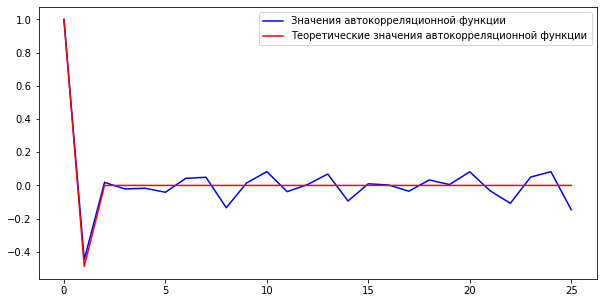

In [50]:
def p1(k):
  if k == 0:
    return 1
  if k == 1: 
    return (-0.8) / (1 + (-0.8)**2)
  return 0

plt.figure(figsize = (10, 5))
plt.plot(range(26), acf(z3, nlags=25, fft=True), 'b', label='Значения автокорреляционной функции')
plt.plot(range(26), np.array([p1(l) for l in range(26)]), 'r', label='Теоретические значения автокорреляционной функции')
plt.legend()
plt.show();

Оценим  весовой  параметр  процесса на  основе  функции автокорреляции:

In [51]:
D = (1/acf(z3, nlags=2, fft=True)[1])**2 - 4
theta1 = (-(1/acf(z3, nlags=2, fft=True)[1]) + np.sqrt(D)) / 2
theta2 = (-(1/acf(z3, nlags=2, fft=True)[1]) - np.sqrt(D)) / 2
print(f"theta1 = {theta1}; theta2 = {theta2} => весовой  параметр = {theta2}")

theta1 = 1.6290729269934823; theta2 = 0.6138460614194473 => весовой  параметр = 0.6138460614194473


Создадим временной ряд процесса АРСС(1, 1):

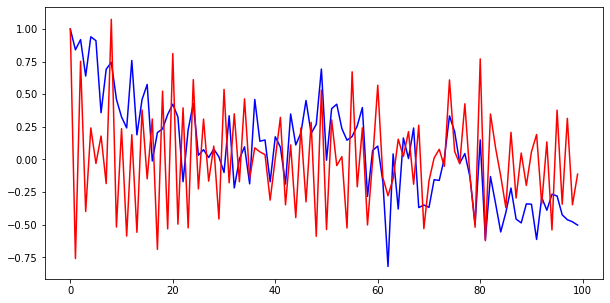

In [52]:
z5 = np.zeros(100)
z6 = np.zeros(100)

z5[0] = 1
z6[0] = 1
ar = 0.2 * np.random.randn(100)

for i in range(1,100):
  z5[i] = 0.8 * z1[i-1] + ar[i] -0.3 * ar[i-1]
  z6[i] = -0.8 * z2[i-1] + ar[i] -0.3 * ar[i -1]
  
plt.figure(figsize= (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()

  Построим их автокорреляционные функции:

<Figure size 720x360 with 0 Axes>

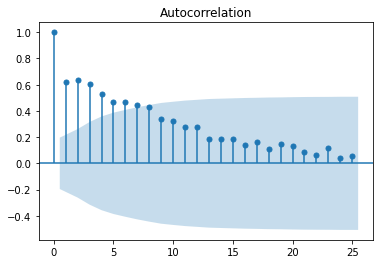

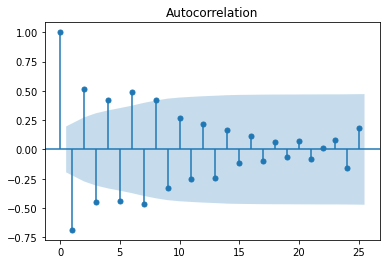

In [53]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

Используем следующую функцию для создания АРСС (2, 2):

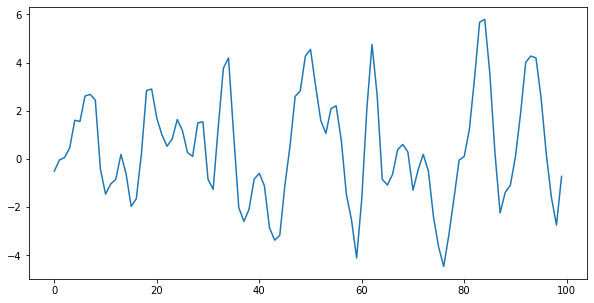

In [54]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35])  # задаем коэффициенты СС   
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100) # создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

plt.figure(figsize= (10, 5))
plt.plot(y)
plt.show()

Построим ее автокорреляционную функцию:

<Figure size 720x360 with 0 Axes>

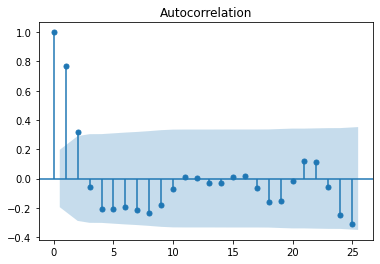

In [55]:
plt.figure(figsize = (10, 5))
plot_acf(y, lags=25)
plt.show()

Теперь проведем анализ неизвестного ряда:

In [56]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 4.50,  3.57,  2.24,  1.78,  0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08,  0.95, 0.45]

Построим график ВР и его автокорреляционную функцию:

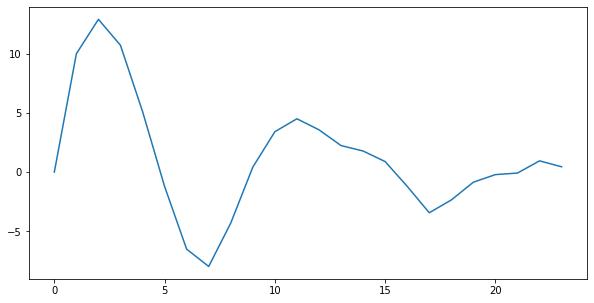

In [57]:
plt.figure(figsize= (10, 5))
plt.plot(TEST)
plt.show()

<Figure size 720x360 with 0 Axes>

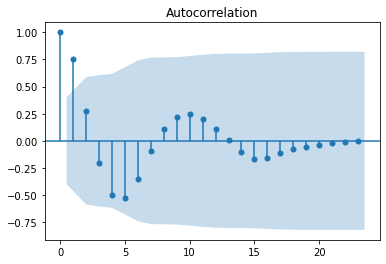

In [58]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=len(TEST)-1)
plt.show()

По  нимможно  судить,  что  ВР,  в  достаточной  степени, стационарен, а, так как, эта функция является знакопеременной, то один из членов АР модели имеет отрицательный вес. Создадим  три  пробные  модели  АРПСС  для  проверки  ряда  на:
1.   АР(1) = АРПСС(1, 0, 0)
2.   АР(2)
3.   АР(3), без тренда (trend= ‘nc’)

In [59]:
arima1 = ARIMA(TEST, order = (1, 0, 0))# создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc')# подгоняем под ВР 
print(model_fit1.summary())# выводим таблицу результатов

arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Mon, 18 Sep 2023   AIC                            128.850
Time:                        10:57:29   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

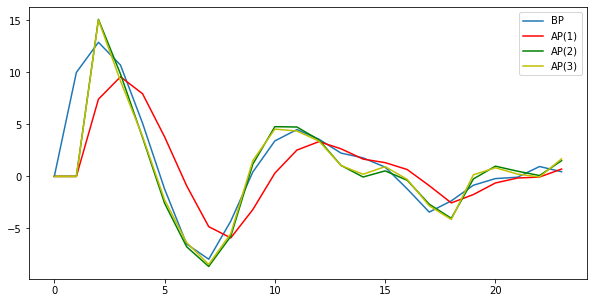

In [60]:
plt.figure(figsize= (10, 5))
plt.plot(TEST, label='ВР')
plt.plot(model_fit1.fittedvalues, 'r', label='АР(1)')
plt.plot(model_fit2.fittedvalues, 'g', label='АР(2)')
plt.plot(model_fit3.fittedvalues, 'y', label='АР(3)')
plt.legend()
plt.show()

Расчитаем весовые  коэффициенты  для  АР моделей  только 1  и  2  порядка самостоятельно:

In [61]:
acf_coefs = acf(TEST, fft=True)
acf_coefs

array([ 1.        ,  0.75500976,  0.27235864, -0.2066116 , -0.49581347,
       -0.52955567, -0.35044634, -0.0963739 ,  0.10437004,  0.21646702,
        0.24520358,  0.19968012,  0.11140263,  0.0036976 , -0.10470012,
       -0.16946472, -0.16160427, -0.10778955, -0.07271434, -0.05285789,
       -0.03431416, -0.01650911, -0.01101053,  0.00157628])

Весовой  коэффициент  АР(1)

In [62]:
theta11 = acf_coefs[1]
print(theta11)

0.7550097626743363


Весовые коэффициенты АР(2)

In [63]:
theta21 = (acf_coefs[1]*(1 - acf_coefs[2])) / (1 - acf_coefs[1]**2)
theta22 = (acf_coefs[2] - acf_coefs[1]**2) / (1 - acf_coefs[1]**2)
print(theta21, theta22)

1.2777374692491608 -0.6923456257350362


Несмотря на некоторые различия, полученные  веса  близки  к  тем,  что  были получены с помощью функций Python.

Загрузим временной ряд Z из файла. Построим график ВР и его автокорреляционную функцию:

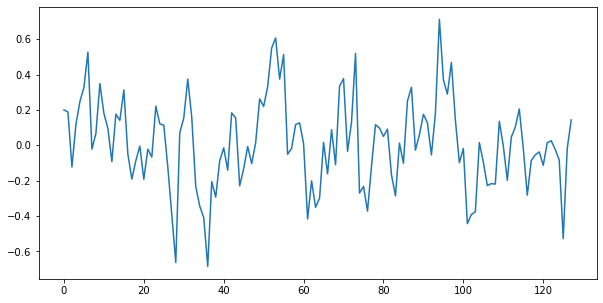

In [64]:
file = h5py.File('19.mat', 'r')
data = file.get('z19')
Z = np.array(data)

plt.figure(figsize = (10, 5))
plt.plot(Z)
plt.show()

<Figure size 720x360 with 0 Axes>

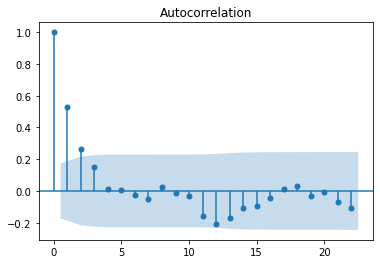

In [65]:
plt.figure(figsize = (10, 5))
plot_acf(Z)
plt.show();

Оценим  порядок  АРССмодели  с помощью  класса ARIMA. 

In [66]:
arimaz = ARIMA(Z, order = (1, 0, 0))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

arimaz = ARIMA(Z, order = (2, 0, 0))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

arimaz = ARIMA(Z, order = (3, 0, 0))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

arimaz = ARIMA(Z, order = (0, 0, 1))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

arimaz = ARIMA(Z, order = (0, 0, 2))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

arimaz = ARIMA(Z, order = (0, 0, 3))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  15.832
Method:                       css-mle   S.D. of innovations              0.214
Date:                Mon, 18 Sep 2023   AIC                            -25.664
Time:                        10:57:36   BIC                            -17.108
Sample:                             0   HQIC                           -22.188
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.040      0.366      0.714      -0.063       0.092
ar.L1.y        0.5279      0.075      7.070      0.000       0.382       0.674
                                    Roots           

Выбираем лучшую модель по параметрам AIC, BIC, HQIC

In [67]:
arimaz = ARIMA(Z, order = (3, 0, 0))
model_fit = arimaz.fit(disp = False)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 0)   Log Likelihood                  15.877
Method:                       css-mle   S.D. of innovations              0.213
Date:                Mon, 18 Sep 2023   AIC                            -21.755
Time:                        10:57:38   BIC                             -7.494
Sample:                             0   HQIC                           -15.961
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0143      0.040      0.362      0.718      -0.063       0.092
ar.L1.y        0.5387      0.088      6.111      0.000       0.366       0.712
ar.L2.y       -0.0296      0.101     -0.295      0.7

Обратимся  к прогнозированиюна  основе  АРПСС моделей. Загрузим ВР из файла:

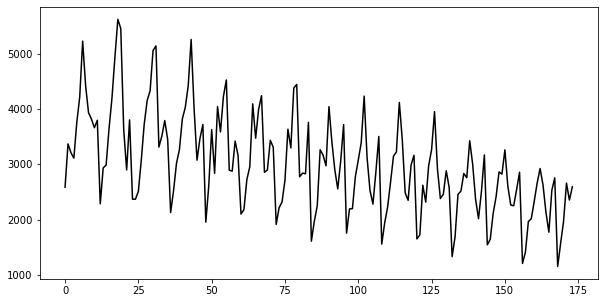

In [68]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)

plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

Будем производить ретроспективный  прогноз. Для  этого  отрежем  от  данного ряда последние 24 точки (которые мы и будем прогнозировать):

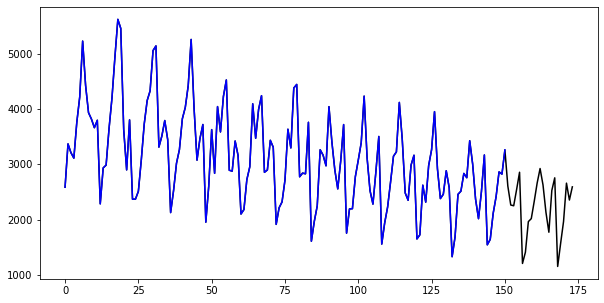

In [69]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t = np.arange(0, len(Z), 1) # временная шкала для регрессии
t = t.reshape(-1,1)

plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанныйряд
plt.show()

In [70]:
Fort.mean()

3010.183908045977

Модели  АРПСС  строятся  для  рядов  с  около-нулевым  средним,  что неверно  для  заданного  временного  ряда.  Построим  линейный  тренд  прогнозируемого  ряда,  а  затем вычтем  его  из исходного  ряда, приведя его к нулевому среднему значению.

b0: 3849.2388462962995; b1: -9.589498082978835


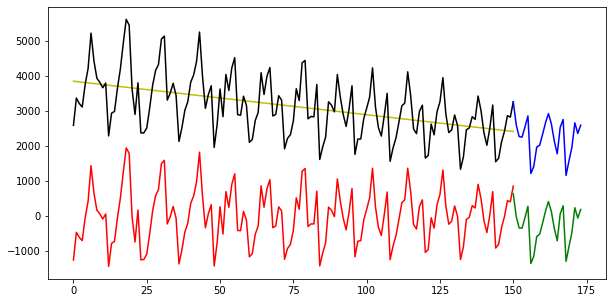

In [71]:
from scipy.optimize import curve_fit

t0 = np.arange(0, len(Fort), 1) # диапазон полного ряда
t0 = t0.reshape(-1,1)

popt, pcov = curve_fit(lambda t, b0, b1: b0 + b1 * t, 
                       t.reshape(1,-1)[0], Z.reshape(1,-1)[0])

print(f"b0: {popt[0]}; b1: {popt[1]}")

Zn = Z - (t*popt[1]+popt[0])
Fort24 = Fort[-24:] - (t[-24:]*popt[1]+popt[0])


plt.figure(figsize = (10, 5))
plt.plot(t, (t*popt[1]+popt[0]), 'y')
plt.plot(t, Z, 'k')
plt.plot(t, Zn, 'r')
plt.plot(t0[-24:], Fort24, 'g')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Рассматривая различные модели АРПСС порядков от 1 до 3, полагаясь на информационные критерии, можно сделать вывод, что по точности все модели примерно одинаковые. Возьмем модель АРПСС(2, 0, 2) как наилучшую модель по информационным критерием с наименьшим количеством параметров.

In [72]:
arimaz10 = ARIMA(Zn, order = (1, 0, 0))
model_fit10 = arimaz10.fit(disp = False) # подгоняем под ВР
print(model_fit10.summary())

arimaz20 = ARIMA(Zn, order = (2, 0, 0))
model_fit20 = arimaz20.fit(disp = False) # подгоняем под ВР
print(model_fit20.summary())

arimaz30 = ARIMA(Zn, order = (3, 0, 0))
model_fit30 = arimaz30.fit(disp = False) # подгоняем под ВР
print(model_fit30.summary())

arimaz11 = ARIMA(Zn, order = (1, 0, 1))
model_fit11 = arimaz11.fit(disp = False) # подгоняем под ВР
print(model_fit11.summary())

arimaz12 = ARIMA(Zn, order = (1, 0, 2))
model_fit12 = arimaz12.fit(disp = False) # подгоняем под ВР
print(model_fit12.summary())

arimaz13 = ARIMA(Zn, order = (1, 0, 3))
model_fit13 = arimaz13.fit(disp = False) # подгоняем под ВР
print(model_fit13.summary())

arimaz21 = ARIMA(Zn, order = (2, 0, 1))
model_fit21 = arimaz21.fit(disp = False) # подгоняем под ВР
print(model_fit21.summary())

arimaz22 = ARIMA(Zn, order = (2, 0, 2))
model_fit22 = arimaz22.fit(disp = False) # подгоняем под ВР
print(model_fit22.summary())

arimaz23 = ARIMA(Zn, order = (2, 0, 3))
model_fit23 = arimaz23.fit(disp = False) # подгоняем под ВР
print(model_fit23.summary())

arimaz31 = ARIMA(Zn, order = (3, 0, 1))
model_fit31 = arimaz31.fit(disp = False) # подгоняем под ВР
print(model_fit31.summary())

arimaz32 = ARIMA(Zn, order = (3, 0, 2))
model_fit32 = arimaz32.fit(disp = False) # подгоняем под ВР
print(model_fit32.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(1, 0)   Log Likelihood               -1193.893
Method:                       css-mle   S.D. of innovations            656.374
Date:                Mon, 18 Sep 2023   AIC                           2393.787
Time:                        10:57:44   BIC                           2402.838
Sample:                             0   HQIC                          2397.464
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6755    104.070     -0.026      0.979    -206.648     201.297
ar.L1.y        0.4900      0.072      6.835      0.000       0.349       0.630
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(1, 3)   Log Likelihood               -1183.892
Method:                       css-mle   S.D. of innovations            612.344
Date:                Mon, 18 Sep 2023   AIC                           2379.784
Time:                        10:57:45   BIC                           2397.888
Sample:                             0   HQIC                          2387.139
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3470     14.395      0.094      0.925     -26.867      29.561
ar.L1.y        0.6971      0.129      5.383      0.000       0.443       0.951
ma.L1.y       -0.2834      0.130     -2.172      0.0

-----------------------------------------------------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(3, 2)   Log Likelihood               -1158.884
Method:                       css-mle   S.D. of innovations            515.657
Date:                Mon, 18 Sep 2023   AIC                           2331.768
Time:                        10:57:46   BIC                           2352.889
Sample:                             0   HQIC                          2340.349
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4911     22.289      0.157      0.876     -40.195      47.178
ar.L1.y        1.7665      0.122     14.451      0.00

In [73]:
arimaz22 = ARIMA(Zn, order = (2, 0, 2))
model_fit22 = arimaz22.fit(disp = False) # подгоняем под ВР
print(model_fit22.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(2, 2)   Log Likelihood               -1156.842
Method:                       css-mle   S.D. of innovations            505.551
Date:                Mon, 18 Sep 2023   AIC                           2325.684
Time:                        10:57:49   BIC                           2343.788
Sample:                             0   HQIC                          2333.039
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8869     34.248      0.113      0.910     -63.239      71.013
ar.L1.y        1.7305      0.005    337.486      0.000       1.720       1.741
ar.L2.y       -0.9964      0.004   -226.644      0.0

Построим   график   прогноза   по   данной   модели   вместе   с доверительными интервалами:

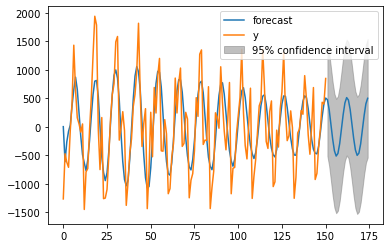

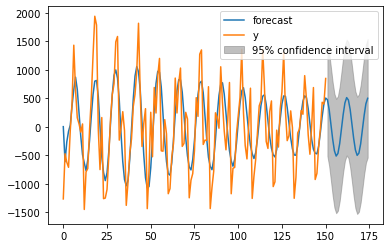

In [74]:
model_fit22.plot_predict(0, len(Fort))

Рассмотрим как этот прогноз по АРПСС модели  соотносится  с  исходными  известными  24  прогнозными точками. Вычтем из исходного ряда Fort линейный тренд и соотнесем их на одном изображении:

<Figure size 720x360 with 0 Axes>

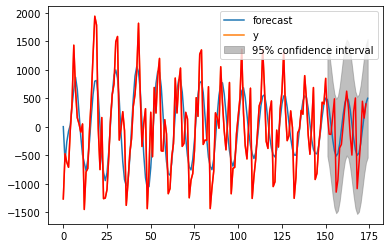

In [75]:
popt, pcov = curve_fit(lambda t, b0, b1: b0 + b1 * t, 
                       t.reshape(1,-1)[0], Z.reshape(1,-1)[0])

trend_as_func_of_t0 = t0*popt[1]+popt[0]

plt.figure(figsize = (10, 5))
model_fit22.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort-(trend_as_func_of_t0), 'r') # исходный ВР минус тренд
plt.show();

Получим прогнозные значения по модели АРПСС и используем эти значения для оценки точности прогноза:

In [76]:
# Средняя ошибка прогноза
def MAE(pred, real):
  return np.mean(np.abs(pred - real))

# СКВО прогноза
def MSD(pred, real):
  return np.sqrt(np.mean((pred - real)**2))

# Средняя ошибка аппроксимации
def MAPE(pred, real):
  return np.mean(np.abs((real - pred) / real))

def res_evaluation(pred, real, title=""):
  print(
      f"Оценка точности прогноза {title}\n"
      f"Средняя ошибка прогноза: {np.round(MAE(pred, real),2)}\n",
      f"СКВО прогноза: {np.round(MSD(pred, real),2)}\n",
      f"Средняя ошибка аппроксимации: {np.round(MAPE(pred, real),2) *100}%\n"
      )

In [77]:
res_evaluation(model_fit22.predict(len(Z), len(Fort)), (Fort-(trend_as_func_of_t0))[-24:])

Оценка точности прогноза 
Средняя ошибка прогноза: 517.42
 СКВО прогноза: 642.58
 Средняя ошибка аппроксимации: 229.99999999999997%



Можно заметить, что средняя ошибка аппроксимации для данной модели больше 100 процентов. Это означает, что ошибки намного больше, чем фактические значения. Тем не менее, метрики MAE и MSD все еще достаточно информативны.

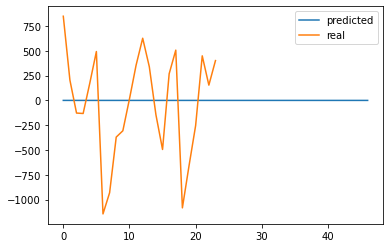

In [78]:
plt.plot(model_fit.predict(len(Z), len(Fort)), label='predicted')
plt.plot((Fort-(trend_as_func_of_t0))[-24:], label='real')
plt.legend()
plt.show()

Также попробуем построить АРПСС модель для прогнозирования данного ряда, но без исходного вычитания из него линейного тренда:

In [79]:
arimaz22r = ARIMA(Z, order = (2, 0, 2))
model_fit22r = arimaz22r.fit(disp = False) # подгоняем под ВР 
print(model_fit22r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(2, 2)   Log Likelihood               -1215.319
Method:                       css-mle   S.D. of innovations            744.434
Date:                Mon, 18 Sep 2023   AIC                           2442.639
Time:                        10:58:30   BIC                           2460.742
Sample:                             0   HQIC                          2449.993
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.7118   2143.390     -0.033      0.974   -4271.678    4130.255
ar.L1.y        1.9950        nan        nan        nan         nan         nan
ar.L2.y       -0.9951        nan        nan        n

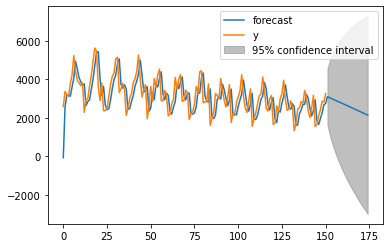

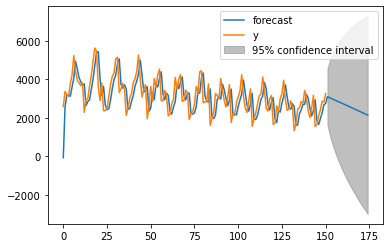

In [80]:
model_fit22r.plot_predict(0, len(Fort))

<Figure size 720x360 with 0 Axes>

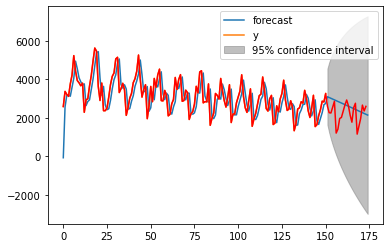

In [81]:
plt.figure(figsize = (10, 5))
model_fit22r.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort, 'r')
plt.show()

В данном случае значение метрик MAE и MSD немного хуже, чем для рядов с около-нулевым средним. При этом теперь значение метрики MAPE имеет смысл.


In [82]:
res_evaluation(model_fit22r.predict(len(Z), len(Fort)), Fort[-24:])

Оценка точности прогноза 
Средняя ошибка прогноза: 546.65
 СКВО прогноза: 703.72
 Средняя ошибка аппроксимации: 31.0%

